#### Space Challange 2021
#### Team eMap

#### تحدي الفضاء ٢٠٢١


# Install Needed Libraries
# تنزيل المكتبات اللازمة

In [1]:
#@title
!pip install -q qrcode pyzbar simplekml geopandas ipyleaflet

     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 994 kB 11.1 MB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 25.1 MB/s 


In [2]:
#@title
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (273 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.14.2-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.14.2-1) ...
Selecting p

# Import Needed Packages
# إدراج المكتبات اللازمة

In [5]:
#@title
import qrcode
import cv2
from matplotlib import pyplot as plt
import numpy as np
from pyzbar.pyzbar import decode
from PIL import Image
import os
import json
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,Polygon,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import requests
import random
from google.colab import output
output.enable_custom_widget_manager()

# Generate QRC Code For URL to GeoJson File
# GeoJSON إصدار رمز إلى رابط يحتوي على ملف

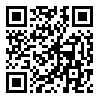

In [6]:
#@title
qr = qrcode.QRCode(
    version=1,
    box_size=3,
    border=2,
)
qr.add_data("https://tinyurl.com/867pzwwa")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("/content/drive/MyDrive/1Space/kqr.png")
img

# Print QRC Code and Put on ground Target Loction
# طباعة الرمز ثم وضعه على الموقع المحدد

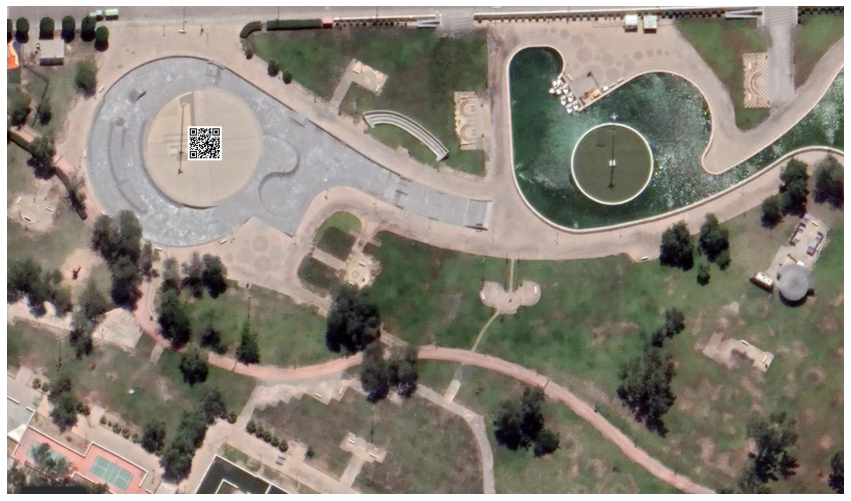

In [7]:
#@title
img = cv2.imread("/content/drive/MyDrive/1Space/KFP.png")
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Scan Aerial Images via QRC Code Detector and Decoder program
# مسح الصور الجوية عن طريق برنامج كاشف و محلل الرمز

Detected and Decoded Code with URL 
 https://tinyurl.com/867pzwwa
تم الكشف و تحليل الرمز و وجود الرابط التالي
 https://tinyurl.com/867pzwwa


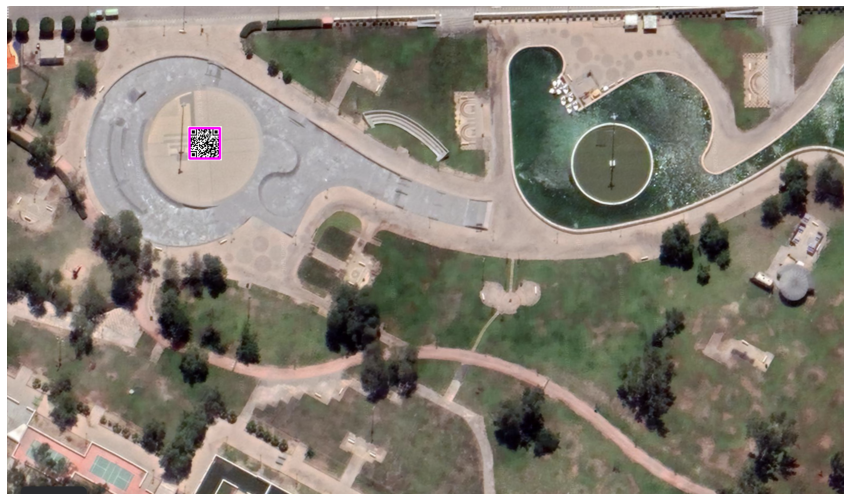

In [8]:
#@title
img = cv2.imread("/content/drive/MyDrive/1Space/KFP.png")
code= decode(img)
if(len(code)>0):
  data = code[0].data.decode('utf-8')
  print(f'Detected and Decoded Code with URL \n {data}')
  print(f'تم الكشف و تحليل الرمز و وجود الرابط التالي\n {data}')
  pnts = np.array([code[0].polygon],np.int32)
  pnts = pnts.reshape((-1,1,2))
  cv2.polylines(img,[pnts],True,(255,0,255),5)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Use the Decoded URL to fetch GeoJSON Data and Draw on A Mapping Application
# استخدام الرابط المستخرج للوصول الى البيانات ثم رسمها على برنامج خرائط

In [9]:
#@title
m = Map(basemap=basemaps.Esri.WorldImagery,center=[26.3931906,50.1242969],zoom=15)
url = 'https://raw.githubusercontent.com/amalatif/space/main/object.geojson'
r = requests.get(url)
with open('europe_110.geo.json', 'w') as f:
      f.write(r.content.decode("utf-8"))
with open('europe_110.geo.json', 'r') as f:
    data = json.load(f)
geo_json = GeoJSON(data=data,
                   style={'color': '#ff00f2', 'radius':8, 
                          'fillColor': '#87f205', 'opacity':0.5, 
                          'weight':4, 'dashArray':'2', 'fillOpacity':0.6},)
m.add_layer(geo_json)
html = HTML('Attributes')
html.layout.margin = '0px 30px 30px 30px'
control = WidgetControl(widget=html, position='topright')
m.add_control(control)
def update_html(feature, **kwargs):
  html.value = '''
     <h3>Attributes</h3>
     <h3>Name: {}</h3>
     <h3>City: {}</h3>
     <h3>Tel: {}</h3>
     <h3>Build Year: {}</h3>
      '''.format(feature['properties']['Name'],feature['properties']['City'],
                 feature['properties']['Tel'],feature['properties']['Build Year'])
geo_json.on_click(update_html)
m

Map(center=[26.3931906, 50.1242969], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

# An Additional Example For Scanning and Detecting the code
# مثال إضافي على المسح و استخراج الرمز

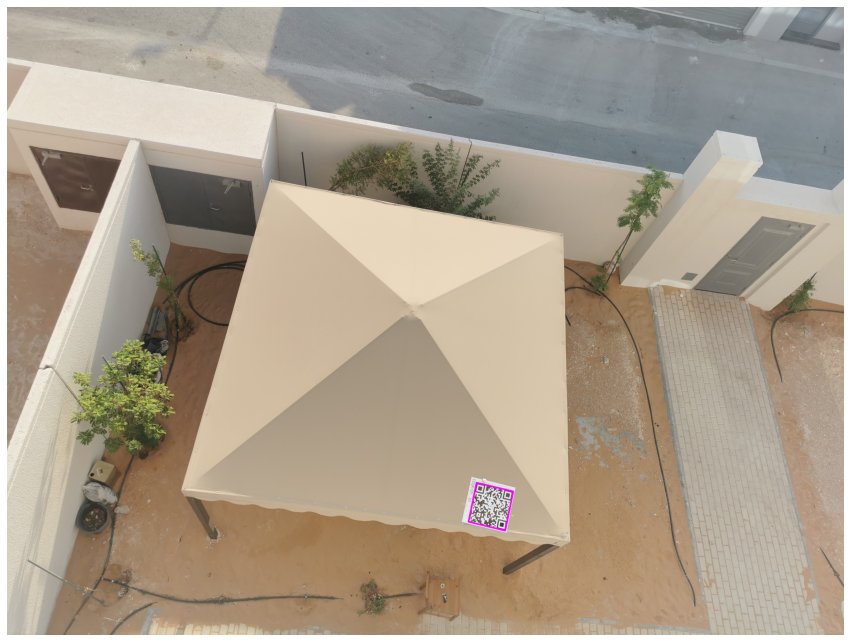

In [10]:
#@title
# exts = ('.jpg','.png','.jpeg','.tif')
exts = ('.jpg')
base = "/content/drive/MyDrive/1Space"
for file in os.listdir(base):
  if file.endswith(exts):
    img_path = os.path.join(base,file)
    img = cv2.imread(img_path)
    code= decode(img)
    if(len(code)>0):
        data = code[0].data.decode('utf-8')
        pnts = np.array([code[0].polygon],np.int32)
        pnts = pnts.reshape((-1,1,2))
        cv2.polylines(img,[pnts],True,(255,0,255),5)
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        break


# Next Steps
* Improve QRC code detection by training deep learning models to localize or segment QRC code location. In more details:
  * Two models will be trained: Single Shot Detector and Mask-R-CNN
  * Sample Images of printed QRC codes will be captured by drone/satellite and labeled to be used as model training data
  * Data augmentation will be applied training data to improve model accuracy
* Develop analytics pipeline to produce reports from captured data to 